In [1]:
import sys
sys.path.append("../src")

from dataset import ImageDataset, TRANSFORM, LABEL_NAME_DIC

import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from torch.utils.data import DataLoader
from tqdm import tqdm

DATA_PATH = "../imagenette"
DATA_FILE = "noisy_imagenette.csv"

In [2]:
pd.read_csv(osp.join(DATA_PATH, DATA_FILE)).head()

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False


In [3]:
pd.read_csv(osp.join(DATA_PATH, DATA_FILE)).tail()

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
13389,val/n03425413/n03425413_17521.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13390,val/n03425413/n03425413_20711.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13391,val/n03425413/n03425413_19050.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13392,val/n03425413/n03425413_13831.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13393,val/n03425413/n03425413_1242.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True


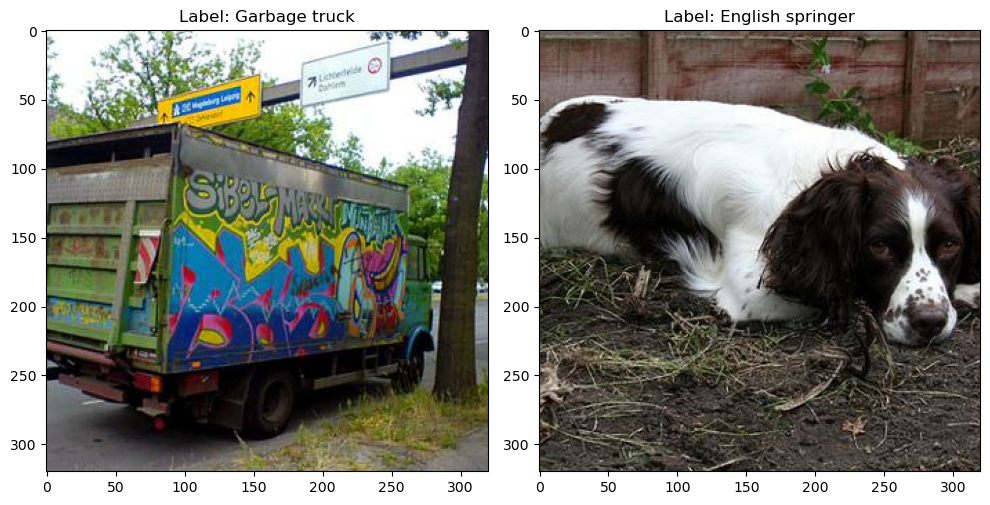

In [4]:
train_dataset = ImageDataset(DATA_PATH, DATA_FILE, TRANSFORM, False)
val_dataset = ImageDataset(DATA_PATH, DATA_FILE, TRANSFORM, True)

toy_image_1, toy_label_1 = train_dataset[1500]
toy_image_2, toy_label_2 = train_dataset[3000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.transpose(toy_image_1.numpy(), (1, 2, 0)))
axs[0].set_title(f"Label: {LABEL_NAME_DIC[toy_label_1.nonzero().item()]}")

axs[1].imshow(np.transpose(toy_image_2.numpy(), (1, 2, 0)))
axs[1].set_title(f"Label: {LABEL_NAME_DIC[toy_label_2.nonzero().item()]}")

plt.tight_layout()
plt.show()

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

for images, labels in tqdm(train_dataloader):
    continue

for images, labels in tqdm(val_dataloader):
    continue

100%|██████████| 62/62 [00:12<00:00,  5.01it/s]


# Average image value

In [5]:
num_image = len(train_dataset)
total_sum = np.zeros(3)

for i in tqdm(range(num_image)):
    image, _ = train_dataset[i]
    total_sum += np.array(image).sum((1, 2))

average_image_value = total_sum / (num_image * image.shape[1] * image.shape[2])
print(f"Average image value (RGB): {(average_image_value * 255).astype(int)}")
print(f"Average value: {int(average_image_value.mean() *255)}")


100%|██████████| 9469/9469 [00:24<00:00, 389.37it/s]

Average image value (RGB): [119 116 109]
Average value: 115
